# Introduction

이 노트북은 PorteSeguro 대회를 위한 데이터에 대한 좋은 통찰력을 얻는 것을 목표로 한다. 그 외에도 모델링을 위해 데이터를 준비할 수 있는 몇 가지 팁과 요령을 제공합니다. 이 노트북은 다음과 같은 주요 섹션으로 구성되어 있습니다.

1. Visual inspection of your data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

In [ ]:
# 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/Porto Seguro’s Safe Driver Prediction/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Porto Seguro’s Safe Driver Prediction/test.csv')

# 한번에 보는 데이터

데이터에 대한 정보들:

- 비슷한 Group에 태그된 feature에는 비슷한 이름을 가지고 있습니다(예: ind, reg, car, calc).

- **bin**이라는 접미사를 가진 feature는 Binary feature임을 나타내고, **cat**이라는 접미사를 가진 feature는 Categorical feature임을 나타냅니다. 

- 이외의 feature는 **Continuous** 또는 **Ordinal feature**입니다.

- -1값은 feature가 **결측치(NaN)**을 의미합니다.

- **Target** 열은 해당 정책 소유자에 대해 클레임이 제기되었는지 여부를 나타냅니다.

이것은 우리가 시작하는데 중요한 정보입니다. 이 모든 것을 확인하기 위해 앞부분(head)과 뒷부분(tail)을 간단히 살펴보겠습니다.

In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


변수는 다음과 같다:

- binary variables

- 값이 정수인 categorical variables

- 정수 또는 부동 소수점 값이 있는 other variables

- 결측치를 나타내는 -1 변수

- Target 변수 및 ID 변수

훈련 데이터의 행과 열 수를 살펴보겠습니다.

In [ ]:
train.shape

(595212, 59)

59개의 변수와 595,212개의 행이 있습니다. 테스트 데이터에 같은 수의 변수가 있는지 확인해 보겠습니다. 훈련 데이터에 중복된 행이 있는지 확인해 보겠습니다.

In [ ]:
train.drop_duplicates()
train.shape

(595212, 59)

중복이 없다는 것을 확인 했습니다.

In [ ]:
test.shape

(892816, 58)

- 테스트 데이터에서 변수가 하나 누락됐지만 이것은 Target 변수입니다.
- 이제 각 유형의 변수가 몇 개인지 조사해 보겠습니다.
- 나중에 14개의 범주형 변수에 대한 더미화 시킬 것입니다.
- 접미사로 **bin**이 붙은 변수는 이미 이항 변수이므로 따로 더미화시킬 필요가 없습니다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

- `info()` 메소드를 사용하면 데이터 유형이 정수 또는 부동 소수라는 것을 알 수 있습니다.

- 결측치는 -1로 대체되기 때문에 정상입니다.

# Metadata

데이터 관리를 용이하게 하기 위해 우리는 variable의 정보들을 데이터 프레임의 형태로 저장하고자 합니다. 이는 분석, 시각화, 모델링 등에 사용할 특정 변수를 선택하려는 경우에 유용합니다.

구체적으로 다음을 저장합니다:
- role : input, ID, Target
- level : nominal, interval, ordinal, binary
- keep : True or False
- dtype : int,float,str

In [ ]:
data = []
for f in train.columns:
  # role 정의
    # target과 id를 지정해준 뒤, 나머지는 모두 input으로 지정합니다.
  if f == 'target':
    role = 'target'
  elif f == 'id':
    role = 'id'
  else:
    role = 'input'

  # level 정의
    # target과 bin은 binary, id와 cat은 nominal, 나머지는 데이터 타입에 따라 float와 int로 지정합니다.
  if 'bin' in f or f == 'target':
    level = 'binary'
  elif 'cat' in f or f == 'id':
    level = 'nominal'
  elif train[f].dtype == 'float64':
    level = 'interval'
  elif train[f].dtype == 'int64':
    level = 'ordinal'

  # ID를 제외한 모든 변수를 True로 지정
  keep = True
  if f == 'id':
    keep = False

  # data type 지정
  dtype = train[f].dtype

  # 모든 변수의 메타 데이터를 포함하는 딕셔너리 생성
  f_dict = {
      'varname' : f,
      'role' : role,
      'level' : level,
      'keep' : keep,
      'dtype' : dtype
  }
  data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

- 원본에서는 메타 데이터의 level을 구분할 때 `train[f].dtype == float`와 같은 형식으로 코드가 작성됐습니다.
- 기존의 코드대로 진행하면 dtype 부분에서 원하는대로 데이터가 구분되지 않습니다. 
- 데이터 형식 뒤에 **64**도 반드시 입력해줘야 합니다.

In [ ]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


예시로 level이 nominal인 데이터의 인덱스를 추출해봅니다.

In [ ]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

role과 level에 따른 target의 수를 아래를 통해 확인해봅니다.

In [ ]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# 기술 통계량

- 데이터프레임에 describe메소드를 사용하여 기술통계량을 살펴보도록 합니다. 
- 그러나 describe메소드는 categorical, id variable의 기술통계량은 계산해주지 않습니다.
- 범주형 변수에 대해서는 나중에 시각적으로 살펴보겠습니다.
- 메타 파일 덕분에 우리는 기술 통계를 계산할 변수를 쉽게 선택할 수 있습니다.
- 명확하게 하기 위해 데이터 유형별로 이 작업을 수행합니다.

## Interval variables

In [ ]:
v = meta[(meta.level=='interval')&(meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**reg_variables**
- 오직 ps_reg_03만 결측치가 있습니다.
- 변수 간의 범위(최소 ~ 최대값)가 다릅니다. 스케일링(예:StandardScaler)을 적용할 수 있지만 사용할 분류기에 따라 다릅니다.

**car_variables**
- ps_car_12와 ps_car_14에 결측치가 있습니다.
- 범위가 달라서 스케일링을 적용해야 합니다.

**calc_variables**
- 결측치가 없습니다.
- 이것은 최대가 0.9이기 때문에 일종의 비율인 것 같습니다.
- 세 변수 모두 분포가 유사합니다.

전체적으로 interval variables들 간의 범위가 상대적으로 좁음을 알 수 있습니다. 데이터를 익명화하기 위해 어떤 변환(예: 로그)이 이미 적용되어 있는 것은 아닐까요?

**기술 통계를 살펴봄으로써 다음과 같은 결과를 얻었습니다.**
- Feature 내부에 결측치의 존재 유무
- min과 max를 비교함으로써 스케일링의 필요성 판단
- max 값을 살펴봄으로써 변수의 값이 비율인지 판단

## Ordinal variables

In [ ]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- ps_car_11에 결측치가 있습니다.
- 우리는 다른 범위를 다루기 위해 스케일링을 적용할 수 있습니다.

## Binary variables

In [ ]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 훈련 데이터의 target 평균은 3.645%입니다. 결괏값이 **매우 불균형함**을 알 수 있습니다.
- 평균값을 통해 대다수의 변수에 대한 값이 0이라는 결론을 내릴 수 있습니다.

# Handling imbalanced classes

위에서 언급한 것처럼 target=1인 비율은 target=0보다 훨씬 작습니다. 이는 정확도는 높지만 실제로 부간적인 value가 추가될 수 있습니다. 이 문제를 해결하기 위해 가능한 두 가지 전략은 다음과 같습니다:

- target=1을 사용하여 레코드를 오버샘플링
- target=0인 언더샘플링 레코드

훈련데이터가 꽤 크기 때문에 언더 샘플링을 진행할 수 있습니다.

In [ ]:
desired_apriori=0.10

# target value의 인덱스 추출
idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

# target value의 기존 record 수 구하기
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# undersampling 비율을 계산하고 target=0인 레코드 수 계산
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Target=0이 포함된 언더샘플링 레코드 비율: {}'.format(undersampling_rate))
print('언더샘플링 후 Target=0인 레코드 수: {}'.format(undersampled_nb_0))

# shuffle을 활용하여 undersampling된 개수만큼의 samples를 가지는 nb=0을 무작위로 추출
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# 추출한 인덱스와 기존의 idx_1을 활용하여 리스트 생성
idx_list = list(undersampled_idx) + list(idx_1)

# undersample된 데이터 프레임 
train = train.loc[idx_list].reset_index(drop=True)

Target=0이 포함된 언더샘플링 레코드 비율: 0.34043569687437886
언더샘플링 후 Target=0인 레코드 수: 195246


# Data Quality Checks

## 결측치 확인

결측치는 -1로 나타남

In [ ]:
vars_with_missing = []

for f in train.columns:
  missings= train[train[f]==-1][f].count()
  if missings > 0:
    vars_with_missing.append(f)
    missing_perc = missings/train.shape[0]

    print('변수 {}에 결측치가 있는 {}개의 레코드({:.2%})'.format(f, missings, missing_perc))

print('전체, 결측치가 있는 변수는 {}개이다.'.format(len(vars_with_missing)))

변수 ps_ind_02_cat에 결측치가 있는 103개의 레코드(0.05%)
변수 ps_ind_04_cat에 결측치가 있는 51개의 레코드(0.02%)
변수 ps_ind_05_cat에 결측치가 있는 2256개의 레코드(1.04%)
변수 ps_reg_03에 결측치가 있는 38580개의 레코드(17.78%)
변수 ps_car_01_cat에 결측치가 있는 62개의 레코드(0.03%)
변수 ps_car_02_cat에 결측치가 있는 2개의 레코드(0.00%)
변수 ps_car_03_cat에 결측치가 있는 148367개의 레코드(68.39%)
변수 ps_car_05_cat에 결측치가 있는 96026개의 레코드(44.26%)
변수 ps_car_07_cat에 결측치가 있는 4431개의 레코드(2.04%)
변수 ps_car_09_cat에 결측치가 있는 230개의 레코드(0.11%)
변수 ps_car_11에 결측치가 있는 1개의 레코드(0.00%)
변수 ps_car_14에 결측치가 있는 15726개의 레코드(7.25%)
전체, 결측치가 있는 변수는 12개이다.


**ps_car_03_cat & ps_car_05_cat**
- 결측치가 대부분의 비율을 차지합니다.(68.39%, 44.26%)
- 이 변수들은 제거합니다.

결측치가 있는 범주형 변수의 경우 결측치 -1을 그대로 유지할 수 있습니다.

**ps_reg_03**
- (연속형) 전체 레코드의 18%에 대해 결측치이 있습니다. 평균으로 대체합니다.

**ps_car_11**
- (서수) 결측치이 있는 레코드가 5개만 있습니다. 
- ordinal 형태이므로 평균값으로 대체하면 안됩니다.
- 최빈값으로 대체합니다.

**ps_car_12**
- (연속형) 결측치이 있는 레코드가 1개만 있습니다. 평균으로 대체합니다.

**ps_car_14**
- (연속형) 전체 레코드의 7%의 결측치가 있습니다. 평균으로 대체합니다.

In [ ]:
# 너무 결측치가 많은 변수 제거 (68.4%, 44.3%)
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False # 메타데이터를 업데이트

# 결측값을 Imputer를 활용하여 변환
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

## Checking the cardinality of the categorical variables

- 카디널리티는 전체 행에 대한 특정 칼럼의 중복 수치를 나타내는 지표입니다.

- 중복도가 높으면 카디나리티가 낮으며, 중복도가 낮으면 카디날리티가 높습니다.

- 카티날리티는 상대적인 개념으로 이해해야 합니다.

- 따라서 카디날리티는 variable 내에 다른 value의 갯수를 말합니다. 

- 우리는 추후 categorical variables를 더 미화시킬 것인데, variables 내에 다른 value들이 얼마나 많은지 체크해봐야 합니다.

- Value들이 많은 경우, 수 많은 더미 변수들이 만들어질 수 있기 때문입니다.

In [ ]:
v = meta[(meta.level=='nominal')&(meta.keep)].index
for f in v:
  dist_values = train[f].value_counts().shape[0]
  print('변수 {}는 {}개의 구별된 값을 가지고 있습니다'.format(f, dist_values))

변수 ps_ind_02_cat는 5개의 구별된 값을 가지고 있습니다
변수 ps_ind_04_cat는 3개의 구별된 값을 가지고 있습니다
변수 ps_ind_05_cat는 8개의 구별된 값을 가지고 있습니다
변수 ps_car_01_cat는 13개의 구별된 값을 가지고 있습니다
변수 ps_car_02_cat는 3개의 구별된 값을 가지고 있습니다
변수 ps_car_04_cat는 10개의 구별된 값을 가지고 있습니다
변수 ps_car_06_cat는 18개의 구별된 값을 가지고 있습니다
변수 ps_car_07_cat는 3개의 구별된 값을 가지고 있습니다
변수 ps_car_08_cat는 2개의 구별된 값을 가지고 있습니다
변수 ps_car_09_cat는 6개의 구별된 값을 가지고 있습니다
변수 ps_car_10_cat는 3개의 구별된 값을 가지고 있습니다
변수 ps_car_11_cat는 104개의 구별된 값을 가지고 있습니다


- 합리적이지만, ps_car_11_cat는 104개로 매우 많은 Value를 가지고 있습니다.

EDIT: 최초 작성자분은 104개의 Value에 대해 가공을 하여 데이터 손실이 있었던 것으로 보입니다. 이후 최초 작성자분은 Oliver의 커널을 활용한 방법을 사용했습니다.

In [ ]:
# Noise를 일으키는 함수
def add_noise(series, noise_level): #시리즈 값과 노이즈 레벨을 변수로 받아서
  return series * (1+noise_level *np.random.randint(len(series))) # 시리즈(1+노이즈레벨 * 표준평균분포로부터 샘플링된 난수)로 return


def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
  '''
  Smoothing은 다니엘 미키-바레카에 의해 다음 논문과 같이 계산됩니다.
  https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
  trn_series : 범주형 feature을 pd로 훈련합니다(Series).
  tst_series : 범주형 feature를 pd로 테스트합니다(Series).
  target : 대상 데이터를 pd로 지정합니다(Series).
  min_color_leaf(int) : 범주 평균을 고려할 최소 샘플
  smoothing(int): 범주형 평균과 이전 평균의 균형을 조정하는 smoothing 효과
  '''
  # trn_series는 train['ps_car_11_cat'], target은 train['target'] / 두 시리즈의 길이가 같은지 확인
  assert len(trn_series) == len(target) 
 
  # train['ps_car_11_cat']과 test['ps_car_11_cat']의 이름이 같은지도 확인
  assert trn_series.name == tst_series.name 
  
  # 두 시리즈를 열을 기준으로 concat한 뒤, temp라는 이름의 변수로 저장 
  temp = pd.concat([trn_series, target], axis=1)

  # target 열의 값들을 train['ps_car_11_cat']기준으로 그룹화한 뒤 mean한수와 count함수를 적용한 값을 averages 변수에 저장
  # averages 함수는 각 Value별 target 평균과 횟수 정보를 담고 있습니다.
  averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])

  # smoothing 계산
  smoothing = 1/ (1+np.exp(-(averages['count'] - min_samples_leaf) / smoothing))

  # prior값은 train['target']의 평균값 / undersampling을 통해 0과 1의 비율을 9:1로 맞추었기 때문에 prior값은 0.1
  prior = target.mean()
  
  # average에 target이라는 이름을 가진 열을 추가 값은 Smoothing을 활용하여 변환
  averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
  
  # 필요한 값은 Smoothing한 값 뿐이라서 drop을 활용하여 mean과 count를 drop한다
  averages.drop(['mean', 'count'], axis=1, inplace=True)
  # trn series 평균 적용
  ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name), # ps_car_11_cat 시리즈를 to_frame으로 데이터프레임으로 가져옴
                           averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}), # averages의 인덱스를 초기화하고, 인덱스 값의 명칭을 target, target이었던 열 이름을 average로 바꿈
                           on = trn_series.name, # on값과 how값을 지정해주어 merge해줍니다.
                           how='left')['average'].rename(trn_series.name + '_mean').fillna(prior) # 시리즈의 명칭을 ps_car_11_cat_mean으로 rename해주고 결측값은 prior 값으로 대체
  
  # 새롭게 만든 시리즈의 인덱스를 기존 train 데이터 시리즈 인덱스와 맞춰준다.
  ft_trn_series.index = trn_series.index
  
  # tst series 평균 적용 
  ft_tst_series= pd.merge(
      tst_series.to_frame(tst_series.name),
      averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
      on = tst_series.name,
      how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

  # pd.merge는 인덱스를 유지하지 않아서 따로 저장
  ft_tst_series.index = tst_series.index
  return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

함수에서 진행한 과정들을 요약해보면 다음과 같습니다.
1. noise를 만들어줄 add_noise 함수 정의
2. train 데이터와 target 데이터의 len이 같은지, test 데이터와 train 데이터의 이름이 같은지 확인
3. train 시리즈와 target 시리즈를 concat
4. Value 별 mean과 count 계산하여 Averages로 저장
5. Smoothing을 계산
6. prior를 target 데이터의 평균값으로 정의
7. 앞서 진행했던 Value별 평균에 Smoothing을 진행하고 필요 없어진 mean과 count 제거
8. Averages의 값으로 새로운 시리즈(trn/test_cat_mean) 정의
9. 최초 정의한 add_noise를 적용한 시리즈 반환

In [ ]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                            test['ps_car_11_cat'],
                                            target=train.target,
                                            min_samples_leaf=100,
                                            smoothing=10,
                                            noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False # meta데이터 업데이트
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# Exploratory Data Visualization

## Categorical variables

target=1인 범주형 변수와 고객의 비율을 살펴봅시다.

<Figure size 432x288 with 0 Axes>

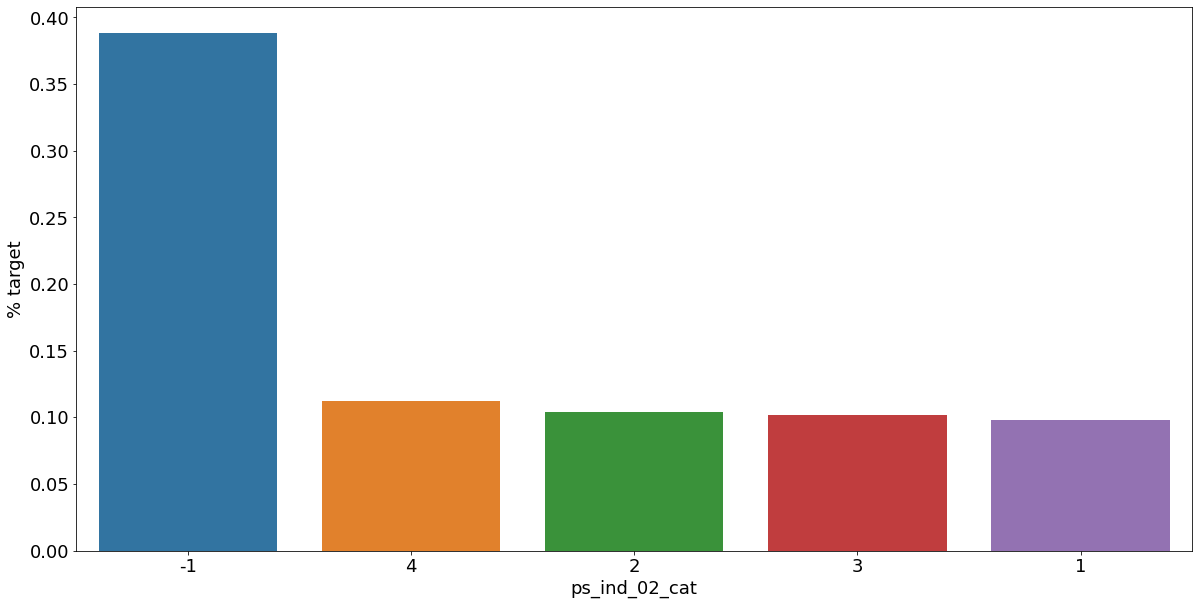

<Figure size 432x288 with 0 Axes>

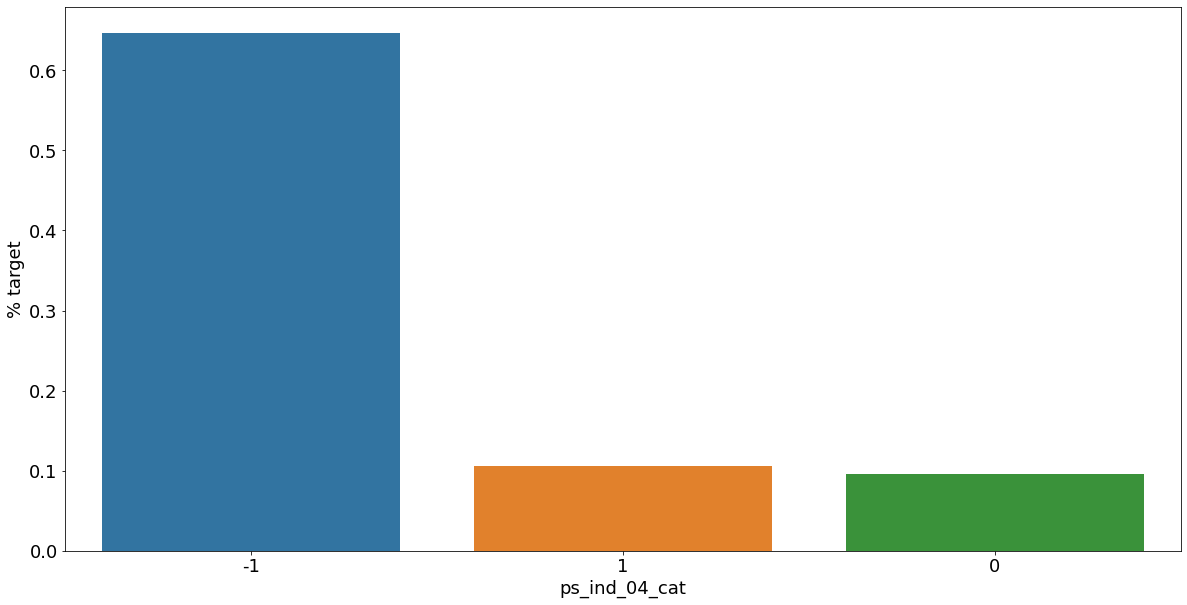

<Figure size 432x288 with 0 Axes>

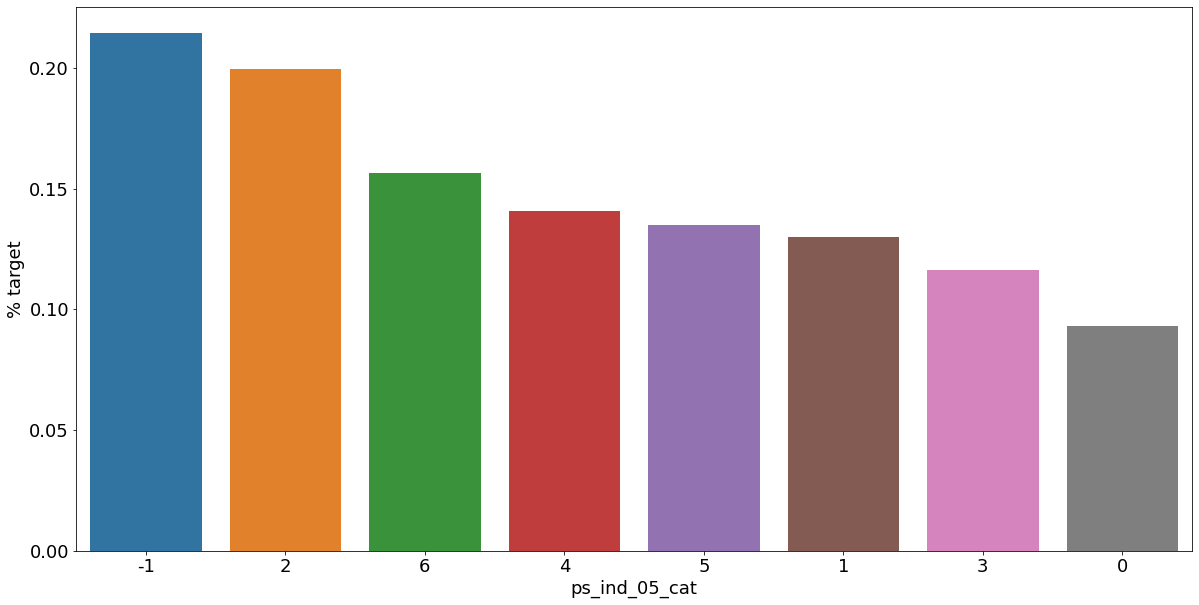

<Figure size 432x288 with 0 Axes>

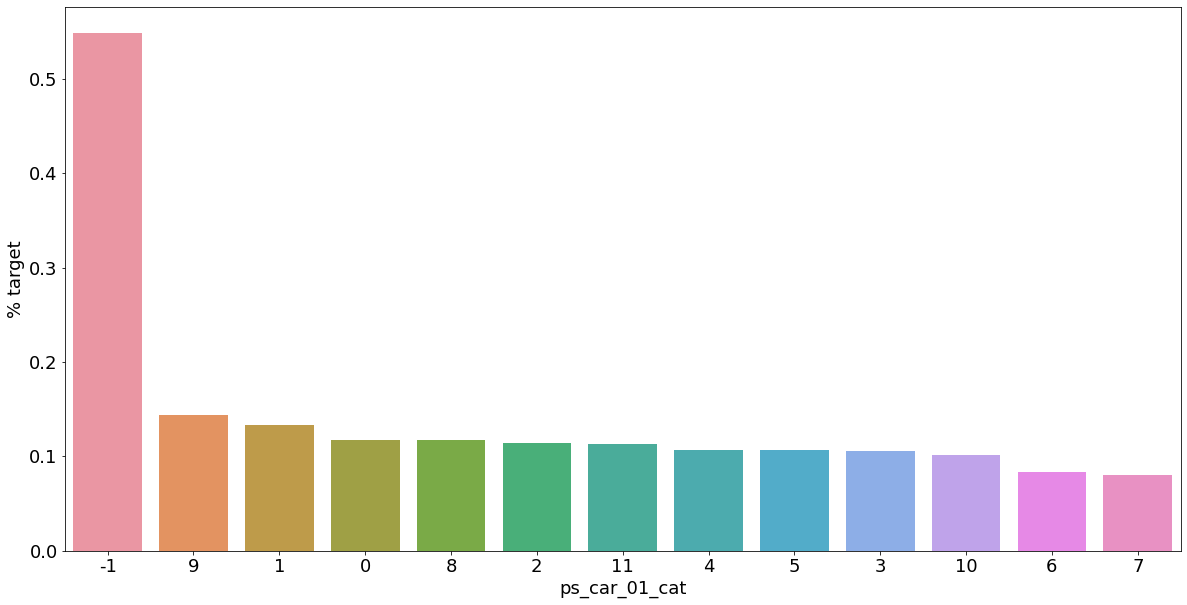

<Figure size 432x288 with 0 Axes>

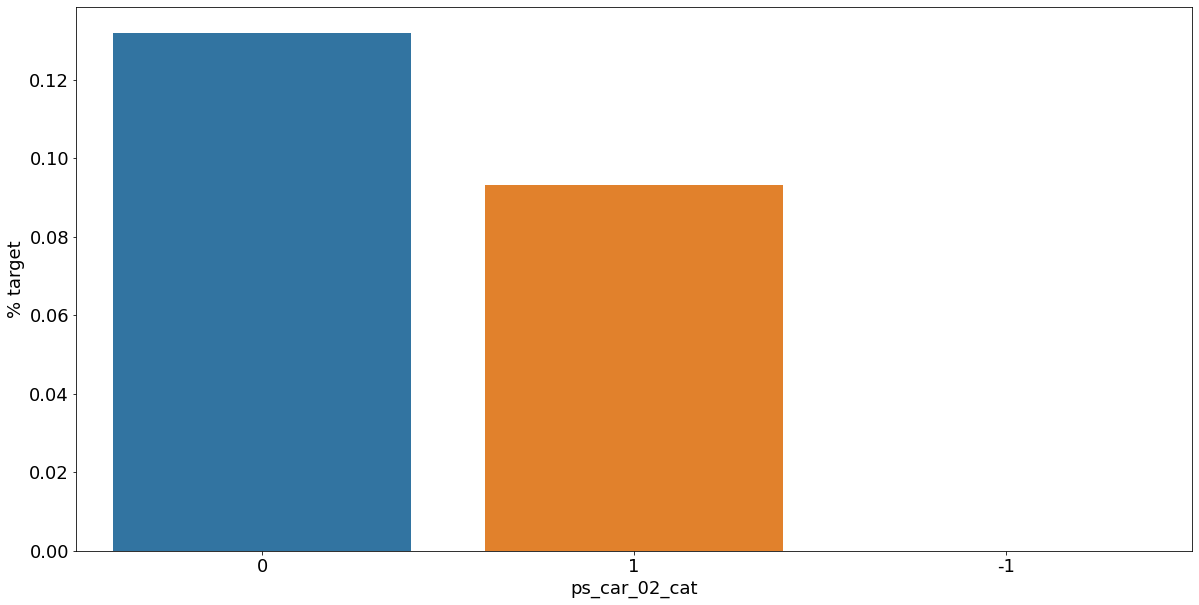

<Figure size 432x288 with 0 Axes>

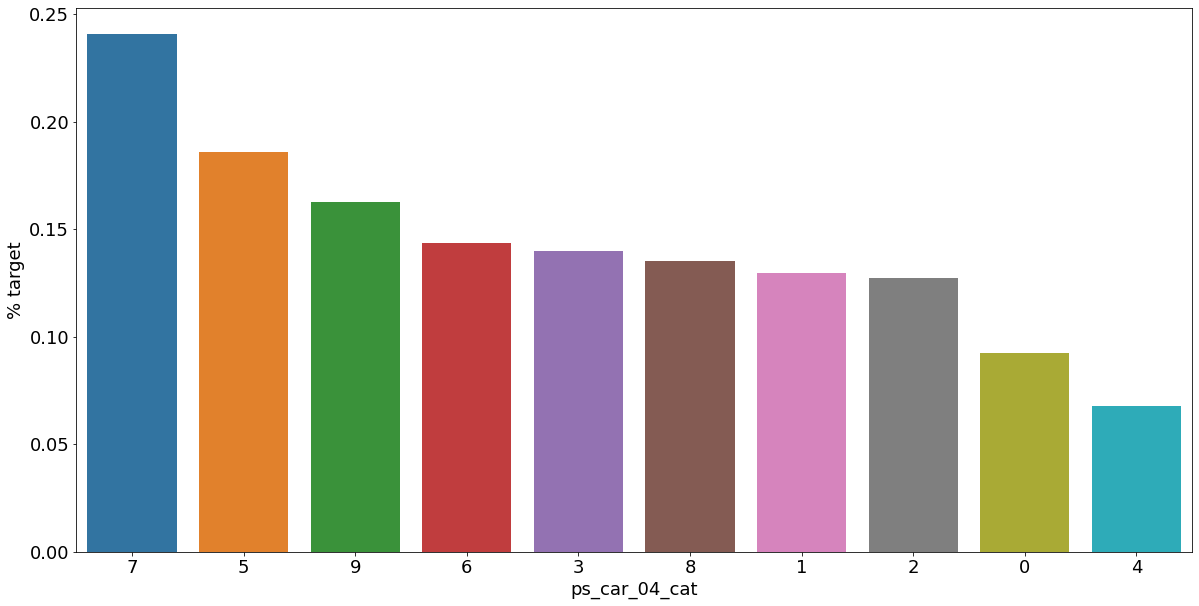

<Figure size 432x288 with 0 Axes>

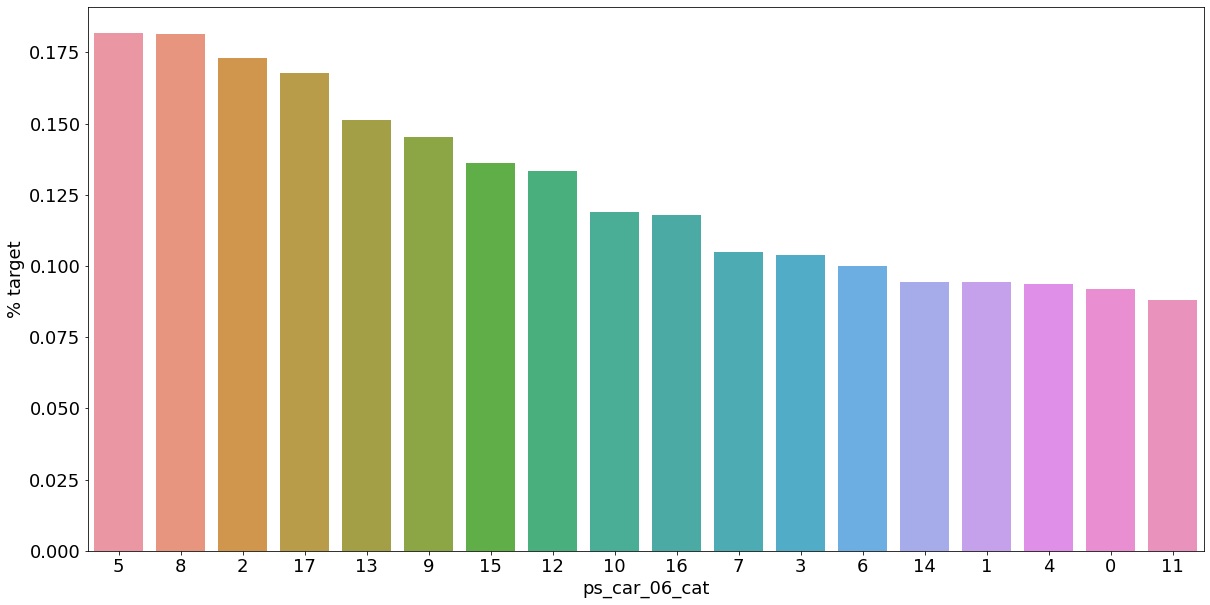

<Figure size 432x288 with 0 Axes>

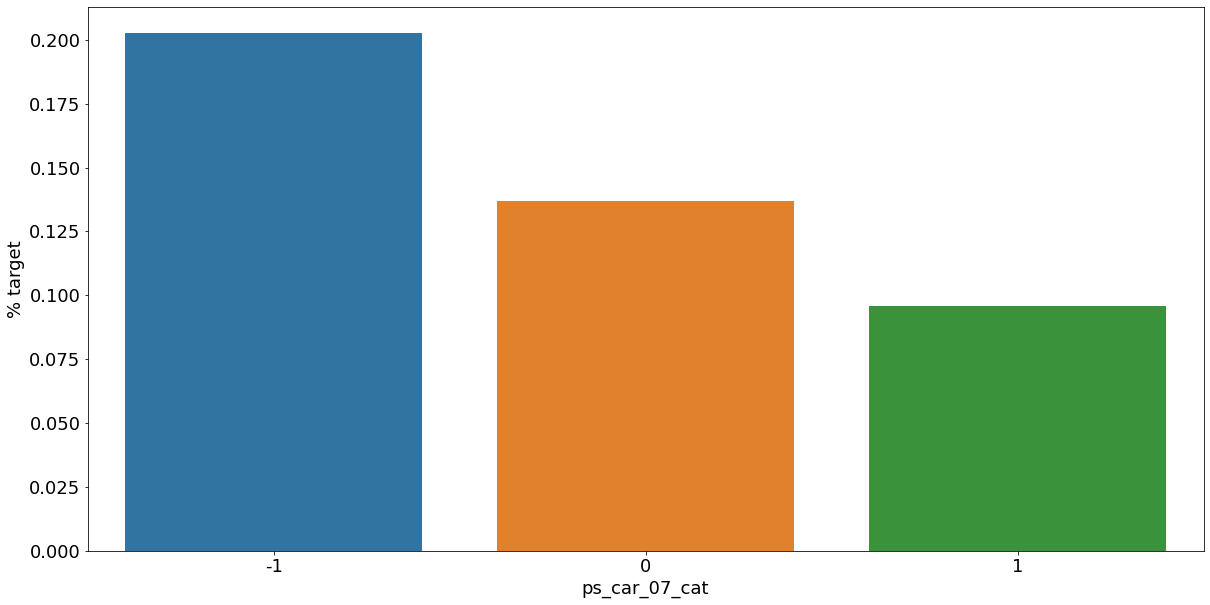

<Figure size 432x288 with 0 Axes>

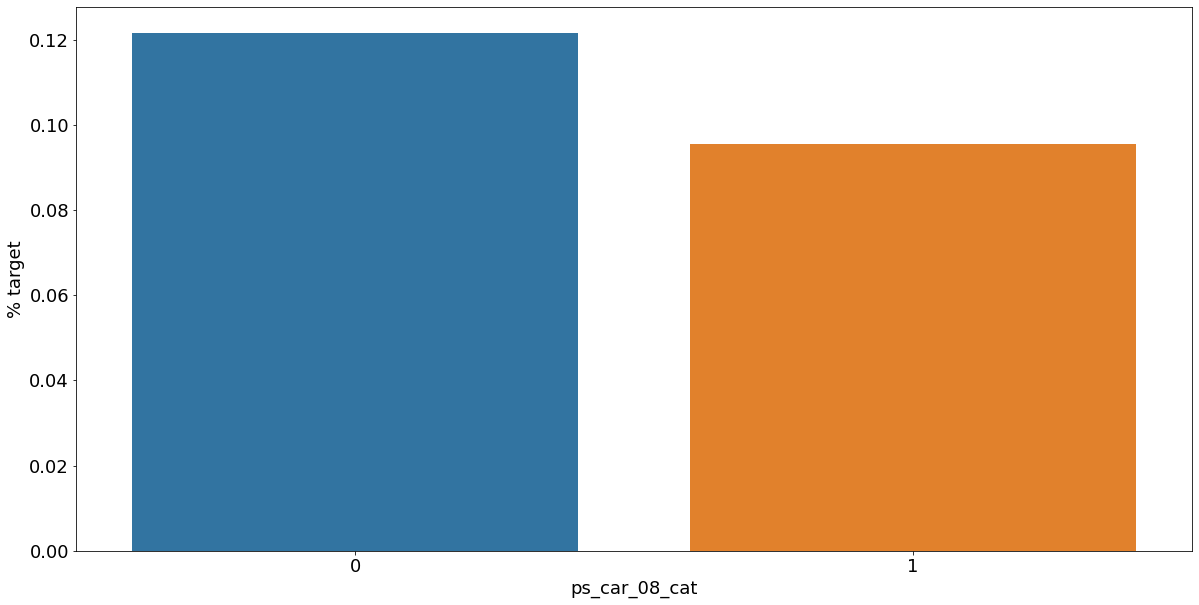

<Figure size 432x288 with 0 Axes>

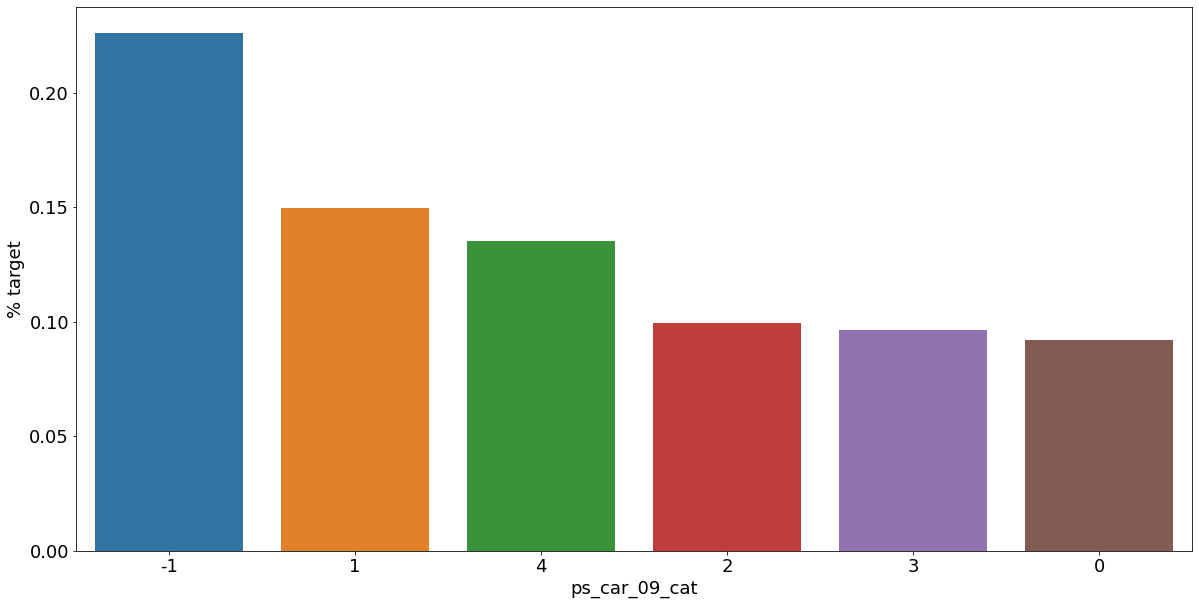

<Figure size 432x288 with 0 Axes>

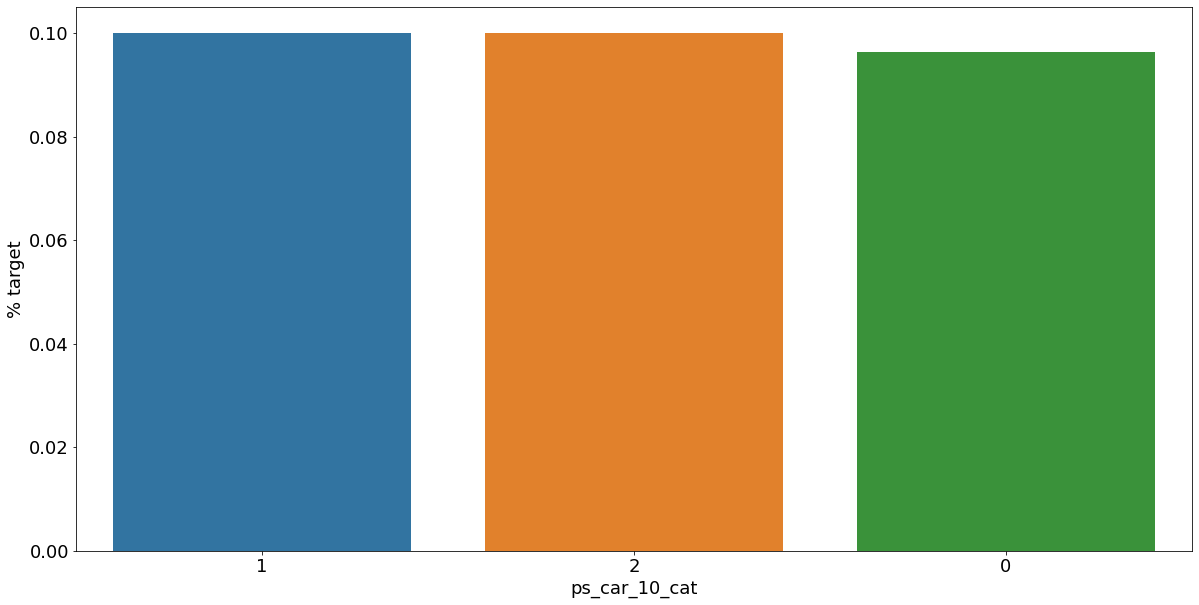

In [ ]:
v = meta[(meta.level=='nominal')&(meta.keep)].index
for f in v:
  plt.figure()
  fig, ax = plt.subplots(figsize=(20,10))
  # 범주형 변수 당 target=1의 백분율 계산
  cat_perc = train[[f,'target']].groupby([f],as_index=False).mean()
  cat_perc.sort_values(by='target', ascending=False, inplace=True)
  # Bar plot
  # target 평균에 내림차순으로 bar plot 정렬
  sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
  plt.ylabel('% target', fontsize=18)
  plt.xlabel(f, fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=18)
  plt.show();

- 막대 그래프들을 통해 **결측값이 있는** variables들을 확인할 수 있습니다.

- 앞서 결측값들을 치환했는데, categorical variables들은 따로 치환을 하지 않았습니다.

- 최빈값으로 대체하는 것보다 분리된 category value로서 결측값을 보는 것이 더 좋은 방법일 수 있습니다.

- 결측값이 가지고 있는 Customer들이 다른 Value들에 비해 훨씬 높은 target 평균을 가지고 있기 때문입니다!

## Interval variables

- Interval 변수 간의 상관관계를 확인하는 중입니다.

- Heatmap은 변수 간의 상관 관계를 시각화하는 좋은 방법입니다.

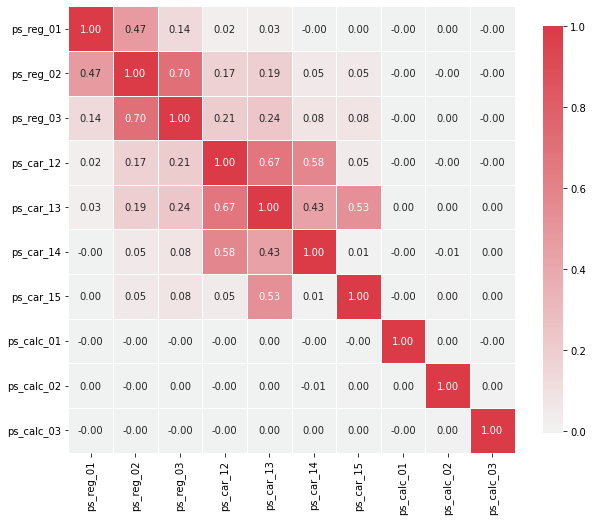

In [ ]:
def corr_heatmap(v):
  correlations = train[v].corr()

  # 두 색상 사이의 색상 지도 만들기
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
              square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.75})
  plt.show();

v = meta[(meta.level=='interval')&(meta.keep)].index
corr_heatmap(v)

- 변수 사이에는 강한 상관 관계가 있습니다:

  - ps_reg_02 및 ps_reg_03(0.7)
  - ps_car_12 및 ps_car_13(0.67)
  - ps_car_12 및 ps_car_14(0.58)
  - ps_car_13 및 ps_car_15(0.67)

- Seaborn에는 변수 간의 (선형) 관계를 시각화할 수 있는 몇 가지 유용한 그림이 있습니다. 
  - Pairplot을 사용하여 변수 간의 관계를 시각화할 수 있습니다.
  - 그러나 heatmap에는 이미 제한된 수의 상관 변수가 표시되어 있으므로 상관관계가 높은 각 변수를 개별적으로 살펴보겠습니다.

- 참고: 프로세스 속도를 높이기 위해 train 데이터의 sample을 수집합니다.

In [ ]:
s = train.sample(frac=0.1)

train 데이터에서 10%의 데이터를 샘플링합니다.

- train.shape → (216940,57)
- s.shape → (21694,57)

**ps_reg_02와 ps_reg_03**

- 회귀선에서 알 수 있듯이, 이 변수들 사이에는 선형 관계가 있습니다.

- hue 파라미터를 통해 target=0과 target=1의 회귀선이 같다는 것을 알 수 있습니다.

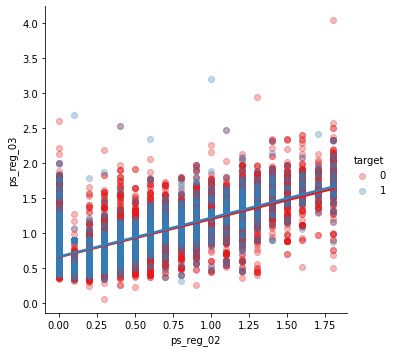

In [ ]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show();

**ps_car_12와 ps_car_13**

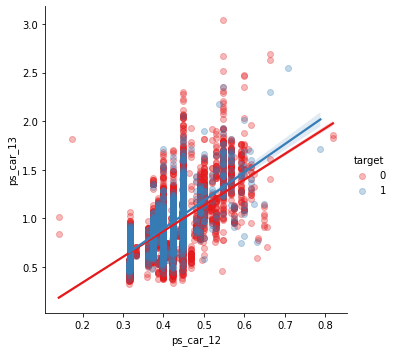

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

**ps_car_12와 ps_car_14**

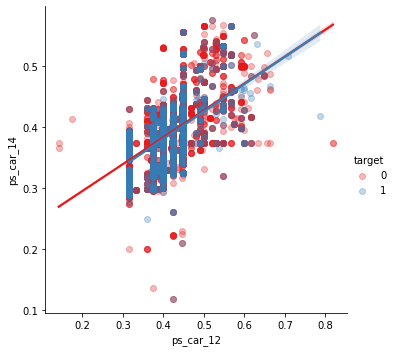

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

**ps_car_13와 ps_car_15**

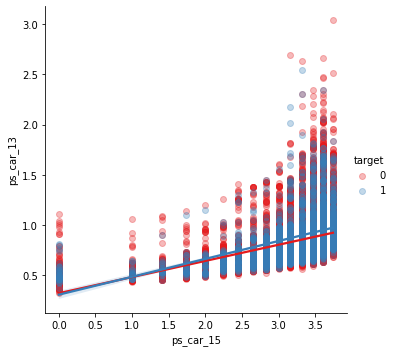

In [ ]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

- 이제는 어떤 correlated variables를 유지할지 결정해야 합니다.

- 이를 위해 우리는 Principal Component Analysis(PCA), 주성분 분석을 실시하여 variables의 dimensions를 줄일 수 있습니다. 

- 하지만 correlated variables의 수가 적은 만큼, 우리는 모델이 heavy-lifting을 하도록 해야 합니다.

## 순서 변수 간의 상관 관계 확인

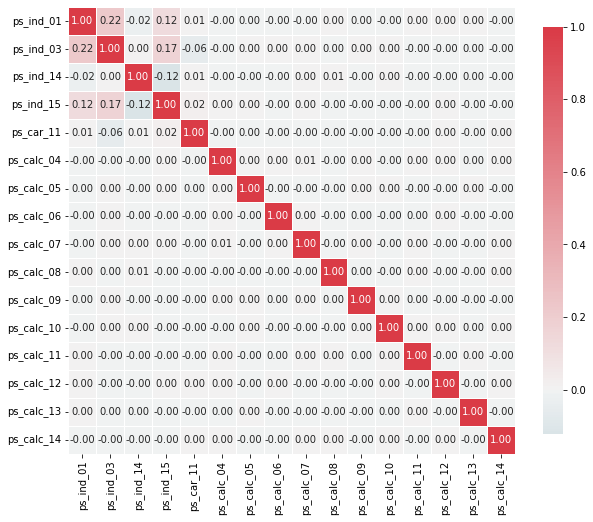

In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

- ordinal variables는 큰 상관관계를 가지고 있지 않은 것으로 보입니다.

- 반면에 Target값으로 그룹화할 때 분포가 어떻게 되는지 확인할 수 있습니다.

# Feature engineering

## dummy 변수 생성

- categorical variables의 값은 순서나 크기를 나타내지 않습니다. 

- 예를 들어, 범주 2는 범주 1의 두 배 값이 아닙니다.

- 따라서 우리는 dummy 데이터를 만들어줌으로써 해결할 수 있습니다.

- 첫 번째 dummy variables의 정보는 원래 variables의 범주에 대해 생성된 다른 dummy variable에서 파생될 수 있으므로 삭제해주도록 합니다.

In [ ]:
v = meta[(meta.level=='nominal')&(meta.keep)].index
print('더미화 하기 전에 우리는 train에서 {}변수들이 있었다.'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('더미화 한 후 우리는 train에서 {}변수들이 있다.'.format(train.shape[1]))

더미화 하기 전에 우리는 train에서 57변수들이 있었다.
더미화 한 후 우리는 train에서 109변수들이 있다.


dummy variables는 train 데이터셋에 52개의 variables를 추가했습니다.

## interaction 변수 생성

In [ ]:
v = meta[(meta.level=='interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v))
interactions.drop(v, axis=1, inplace=True) # poly 처리가 되지 않은 기존의 열들을 삭제

# 훈련 데이터에 interaction 변수 합치기
print('interaction 생성 전 train에 있는 변수는 {}개 있었다.'.format(train.shape[1]))
train=pd.concat([train,interactions],axis=1)
print('interaction 생성 후 train에 있는 변수는 {}개 있다.'.format(train.shape[1]))

interaction 생성 전 train에 있는 변수는 109개 있었다.
interaction 생성 후 train에 있는 변수는 164개 있다.


- PolynomialFeatures는 다항차수 변환 진행을 도와주는 클래스입니다.
- 상기 코드의 경우 degree를 2로 설정했으니 2차항 변수로 만들어주는 것입니다.
- 이를 통해 train 데이터에 interaction variables를 추가할 수 있습니다.
- get_features_names_out메소드 덕분에 열 이름을 할당할 수 있습니다.

# Feature selection

## Removing features with low or zero variance

- 개인적으로 작성자는 분류기의 알고리즘이 유지할 feature를 선택하는 것을 선호한다고 합니다. 
- 하지만 우리 스스로 할 수 있는 일도 있습니다. 분산이 0이거나 아주 적은 feature들을 제거하는 것입니다.

- 이를 위해 사이킷런의 VarianceThreshold라는 메소드를 사용할 수 있습니다. 
- 기본적으로 이 메소드는 분산 값이 0인 features들을 제거해줍니다.

- 하지만 저희는 이전 단계에서 이미 분산이 0인 features가 없음을 확인했기 때문에, 우리는 1% 미만의 분산이 있는 features들을 제거해주고자 합니다.

- 이를 통해 우리는 31개의 variables를 제거하게 됩니다.

In [ ]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id','target'], axis=1)) #ID 및 target 변수가 없이 훈련하기 위해

f = np.vectorize(lambda x: not x) # boolean 배열 요소를 전환하는 함수

v = train.drop(['id','target'],axis=1).columns[f(selector.get_support())]
print('{}변수들은 매우 낮은 분산을 가지고 있습니다.'.format(len(v)))
print('이런 변수들은 {}입니다.'.format(list(v)))

27변수들은 매우 낮은 분산을 가지고 있습니다.
이런 변수들은 ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']입니다.


- 분산을 기반으로 선택한다면 많은 변수를 잃게 될 것입니다. 하지만 변수가 많지 않기 때문에 분류자가 선택하도록 하겠습니다. 
- 변수가 더 많은 데이터 집합의 경우 처리 시간을 줄일 수 있습니다.
- Sklearn은 또한 다른 feature selection 방법과 함께 제공됩니다. 이러한 방법 중 하나는 SelectFromModel로, 다른 분류자가 최상의 기능을 선택하고 계속할 수 있도록 합니다.
- 아래에서는 Random Forest를 사용하는 방법을 보여드리겠습니다.

## Selecting features with a Random Forest and SelectFromModel

- 여기서는 RandomForest의 feature importance에 따라 feature를 선택합니다. 
- 그런 다음 sklearn의 SelectFromModel을 사용하여 유지할 변수의 수를 지정할 수 있습니다.
- feature importance 수준에 대한 임계값을 수동으로 설정할 수 있습니다. 
- 단순히 상위 50%의 최적의 변수만 선택해보도록 합시다.

In [ ]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_13^2                    0.017453
 2) ps_car_13                      0.017442
 3) ps_car_12 ps_car_13            0.017359
 4) ps_car_13 ps_car_14            0.017307
 5) ps_reg_03 ps_car_13            0.017244
 6) ps_car_13 ps_car_15            0.017005
 7) ps_reg_01 ps_car_13            0.016927
 8) ps_reg_03 ps_car_14            0.016381
 9) ps_reg_03 ps_car_12            0.015635
10) ps_reg_03 ps_car_15            0.015254
11) ps_car_14 ps_car_15            0.015185
12) ps_reg_01 ps_reg_03            0.014847
13) ps_car_13 ps_calc_01           0.014817
14) ps_car_13 ps_calc_02           0.014809
15) ps_car_13 ps_calc_03           0.014806
16) ps_reg_02 ps_car_13            0.014806
17) ps_reg_01 ps_car_14            0.014498
18) ps_reg_03                      0.014321
19) ps_reg_03^2                    0.014292
20) ps_reg_03 ps_calc_03           0.013937
21) ps_reg_03 ps_calc_02           0.013908
22) ps_reg_03 ps_calc_01           0.013872
23) ps_calc_10                  

In [ ]:
sfm = SelectFromModel(rf, threshold='median',prefit=True)
print('selsection 전에 feature의 수: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('selection 후 feature의 수: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

selsection 전에 feature의 수: 162


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


selection 후 feature의 수: 81


# Feature scaling

이전에 언급했듯이, 우리는 train 데이터에 정규화를 진행할 수 있습니다. 몇몇 분류기에서는 더 나은 결과를 가져올 수 있을 것입니다.

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.90494248, -0.45941104, -1.26665356, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 0.24006954,  1.55538958,  0.95034274, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.64508122,  1.05168943, -0.52765479, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [ 1.73477713, -0.9631112 ,  0.58084336, ..., -0.46445747,
         0.18545696,  0.27907892],
       [ 1.73485162, -0.9631112 , -0.89715418, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [ 1.73512631, -0.45941104, -1.26665356, ...,  0.28148164,
        -0.11358706, -0.72653353]])

참고

https://www.kaggle.com/code/sihwanyoon/data-preparation-exploration/notebook

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.get_feature_names_out